In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
def save_data(filename, data):
    #Storing data with labels
    a_file = open(filename, "wb")
    pickle.dump(data, a_file)
    a_file.close()
    

def load_data(filename):
    a_file = open(filename, "rb")
    output = pickle.load(a_file)
    a_file.close()
    return output

In [8]:
def find_label_5(pred_label):
    if pred_label in ['1 star', '2 stars']:
        pred_label = 'negative'

    elif pred_label in ['4 stars', '5 stars']:
        pred_label = 'positive'

    else:
        pred_label = 'neutral'
    
    return pred_label


def find_label_2(pred_label, predicted_labels):
    negative = predicted_labels[0]
    positive = predicted_labels[1]

    if pred_label == negative:
        pred_label = 'negative'
    elif pred_label == positive:
        pred_label = 'positive'

    return pred_label


def find_label_1(pred_label, predicted_labels):
    if predicted_labels[0] in ['1 star', '2 stars']:
        pred_label = 'negative'

    elif predicted_labels[0] in ['4 stars', '5 stars']:
        pred_label = 'positive'

    else:
        pred_label = 'neutral'

    return pred_label

In [13]:
def handle_mbert(data):
    predicted_labels = [pred_label for (tweet_id, sentence, pred_label, label, score) in data]
    print(Counter(predicted_labels))
                            
    predicted_labels = list(set(predicted_labels))
    predicted_labels.sort()
    print(predicted_labels)

    new_data = []    
    for (tweet_id, sentence, pred_label, label, score) in data:
        if len(predicted_labels) >= 3:
            pred_label = find_label_5(pred_label)

        elif len(predicted_labels) == 2:
            pred_label = find_label_2(pred_label, predicted_labels)

        elif len(predicted_labels) == 1:
            pred_label = find_label_1(pred_label, predicted_labels)

        new_data.append((tweet_id, sentence, pred_label, label, score))

    return new_data

In [16]:
overall_accuracy = []
positive_accuracy = []
negative_accuracy = []
for i in range(0,10):
    data = load_data('check/iteration_' + str(i) + '.pkl')
    data = handle_mbert(data)
    
    #find overall accuracy:
    overall_correct = np.array([pred_label == label for (tweet_id, sentence, pred_label, label, score) in data])
    overall_accuracy.append(np.sum(overall_correct)/len(data))
                     
    #Classwise accuracy
    positive_correct = np.array([label == pred_label for (tweet_id, sentence, pred_label, label, score) in data if label == 'positive' ])
    negative_correct = np.array([label == pred_label for (tweet_id, sentence, pred_label, label, score) in data if label == 'negative' ])

    positive_accuracy.append(np.sum(positive_correct)/positive_correct.shape[0])
    negative_accuracy.append(np.sum(negative_correct)/negative_correct.shape[0])

Counter({'1 star': 5297, '5 stars': 2519, '3 stars': 505, '2 stars': 257, '4 stars': 158})
['1 star', '2 stars', '3 stars', '4 stars', '5 stars']
Counter({'1 star': 5726, '3 stars': 3010})
['1 star', '3 stars']
Counter({'1 star': 8395, '3 stars': 341})
['1 star', '3 stars']
Counter({'1 star': 6026, '3 stars': 2710})
['1 star', '3 stars']
Counter({'1 star': 5035, '3 stars': 3701})
['1 star', '3 stars']
Counter({'1 star': 5296, '3 stars': 3440})
['1 star', '3 stars']
Counter({'1 star': 5094, '3 stars': 3642})
['1 star', '3 stars']
Counter({'1 star': 4904, '3 stars': 3832})
['1 star', '3 stars']
Counter({'1 star': 4764, '3 stars': 3972})
['1 star', '3 stars']
Counter({'1 star': 4752, '3 stars': 3984})
['1 star', '3 stars']


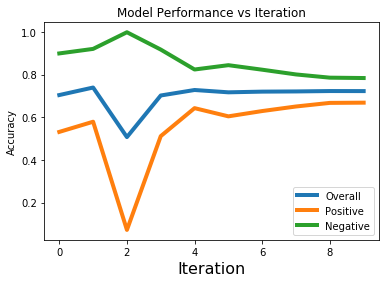

In [17]:
plt.plot(overall_accuracy, linewidth=4)
plt.plot(positive_accuracy, linewidth=4)
plt.plot(negative_accuracy, linewidth=4)
plt.legend(['Overall', 'Positive', 'Negative'])
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Accuracy')
plt.title('Model Performance vs Iteration')
plt.savefig('Plots/PerformanceOfUnbiasedModel.png')

In [18]:
negative_incorrect = [sentence for (tweet_id, sentence, pred_label, label, score) in data if ((label == 'negative') and (label != pred_label)) ]
negative_correct = [sentence for (tweet_id, sentence, pred_label, label, score) in data if ((label == 'negative') and (label == pred_label)) ]

positive_incorrect = [sentence for (tweet_id, sentence, pred_label, label, score) in data if ((label == 'positive') and (label != pred_label)) ]
positive_correct = [sentence for (tweet_id, sentence, pred_label, label, score) in data if ((label == 'positive') and (label == pred_label)) ]

In [20]:
codemixing = load_data('sentimix_train_hin_eng.pkl')

In [21]:
for tweet_id in codemixing:
    print(codemixing[tweet_id])
    break

[9, 11, 'nen á vist bolest vztek smutek zmatek osam ě lost beznad ě j a nakonec jen klid Asi takhle vypad á m ů j life ...', 'neutral']


In [22]:
#Code mixing distribution of entire dataset

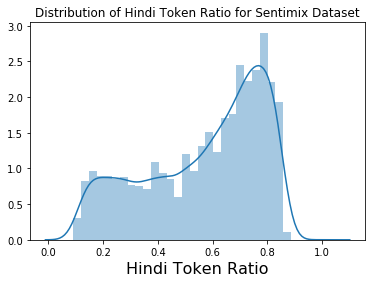

In [23]:
#Actual code mixed distribution of the dataset
codemix = []#original label is positive, but classified incorrectly
for tweet_id in codemixing:
    codemix.append(codemixing[tweet_id][0]/(codemixing[tweet_id][1] + codemixing[tweet_id][0]))
    
sns.distplot(codemix)
plt.xlabel('Hindi Token Ratio', fontsize=16)
plt.title('Distribution of Hindi Token Ratio for Sentimix Dataset')
plt.savefig('Plots/HindiUsageRatio.png')

In [97]:
#See the distribution of actual vs amount of code mixing

In [24]:
negative_actual_codemix = []#original label is positive, but classified incorrectly
for (tweet_id, sentence, pred_label, label, score) in data:
    if label == 'negative':
        negative_actual_codemix .append(codemixing[tweet_id][0]/(codemixing[tweet_id][1] + codemixing[tweet_id][0]))

positive_actual_codemix = []#original label is positive, but classified incorrectly
for (tweet_id, sentence, pred_label, label, score) in data:
    if label == 'positive':
        positive_actual_codemix.append(codemixing[tweet_id][0]/(codemixing[tweet_id][1] + codemixing[tweet_id][0]))

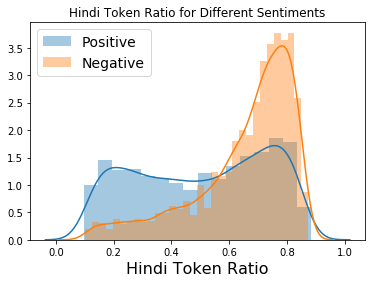

In [25]:
sns.distplot(positive_actual_codemix)
sns.distplot(negative_actual_codemix)
plt.legend(['Positive', 'Negative'], fontsize=14)
plt.xlabel('Hindi Token Ratio', fontsize=16)
plt.title('Hindi Token Ratio for Different Sentiments')
plt.savefig('Plots/HindiUsagebySentiments.png')

In [58]:
#See the distribution of predictions vs amount of code mixing

In [29]:
for i in range(0,12):
    data = load_data('check/iteration_' + str(i) + '.pkl')
    data = handle_mbert(data)
    
    negative_predicted_codemix = []#original label is positive, but classified incorrectly
    for (tweet_id, sentence, pred_label, label, score) in data:
        if pred_label == 'negative':
            negative_predicted_codemix.append(codemixing[tweet_id][0]/(codemixing[tweet_id][1] + codemixing[tweet_id][0]))

    positive_predicted_codemix = []#original label is positive, but classified incorrectly
    for (tweet_id, sentence, pred_label, label, score) in data:
        if pred_label == 'positive':
            positive_predicted_codemix.append(codemixing[tweet_id][0]/(codemixing[tweet_id][1] + codemixing[tweet_id][0]))
    
    sns.distplot(positive_predicted_codemix)
    sns.distplot(negative_predicted_codemix)
    plt.legend(['Positive Prediction', 'Negative Prediction'], fontsize=14)
    plt.xlabel('Hindi Token Ratio', fontsize=16)
    plt.ylim((0,5))
    plt.title('Hindi Token Ratio for Predicted Sentiments ' + str(i))
    plt.savefig('Plots/PredictedSentiments' + str(i) + '.png')
    plt.close()

Counter({'1 star': 5297, '5 stars': 2519, '3 stars': 505, '2 stars': 257, '4 stars': 158})
['1 star', '2 stars', '3 stars', '4 stars', '5 stars']
Counter({'1 star': 5726, '3 stars': 3010})
['1 star', '3 stars']
Counter({'1 star': 8395, '3 stars': 341})
['1 star', '3 stars']
Counter({'1 star': 6026, '3 stars': 2710})
['1 star', '3 stars']
Counter({'1 star': 5035, '3 stars': 3701})
['1 star', '3 stars']
Counter({'1 star': 5296, '3 stars': 3440})
['1 star', '3 stars']
Counter({'1 star': 5094, '3 stars': 3642})
['1 star', '3 stars']
Counter({'1 star': 4904, '3 stars': 3832})
['1 star', '3 stars']
Counter({'1 star': 4764, '3 stars': 3972})
['1 star', '3 stars']
Counter({'1 star': 4752, '3 stars': 3984})
['1 star', '3 stars']
Counter({'1 star': 4403, '3 stars': 4333})
['1 star', '3 stars']
Counter({'3 stars': 4656, '1 star': 4080})
['1 star', '3 stars']


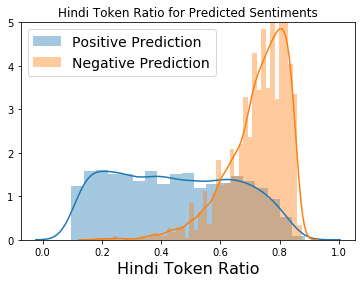

In [30]:
sns.distplot(positive_predicted_codemix)
sns.distplot(negative_predicted_codemix)
plt.legend(['Positive Prediction', 'Negative Prediction'], fontsize=14)
plt.xlabel('Hindi Token Ratio', fontsize=16)
plt.ylim((0,5))
plt.title('Hindi Token Ratio for Predicted Sentiments')
plt.savefig('Plots/PredictedSentiments' + str(i) + '.png')

In [34]:
#calculate distribution of code-mixing: hindi to english words in each category

Counter({'1 star': 5297, '5 stars': 2519, '3 stars': 505, '2 stars': 257, '4 stars': 158})
['1 star', '2 stars', '3 stars', '4 stars', '5 stars']
Counter({'1 star': 5726, '3 stars': 3010})
['1 star', '3 stars']
Counter({'1 star': 8395, '3 stars': 341})
['1 star', '3 stars']
Counter({'1 star': 6026, '3 stars': 2710})
['1 star', '3 stars']
Counter({'1 star': 5035, '3 stars': 3701})
['1 star', '3 stars']
Counter({'1 star': 5296, '3 stars': 3440})
['1 star', '3 stars']
Counter({'1 star': 5094, '3 stars': 3642})
['1 star', '3 stars']
Counter({'1 star': 4904, '3 stars': 3832})
['1 star', '3 stars']
Counter({'1 star': 4764, '3 stars': 3972})
['1 star', '3 stars']
Counter({'1 star': 4752, '3 stars': 3984})
['1 star', '3 stars']
Counter({'1 star': 4403, '3 stars': 4333})
['1 star', '3 stars']
Counter({'3 stars': 4656, '1 star': 4080})
['1 star', '3 stars']


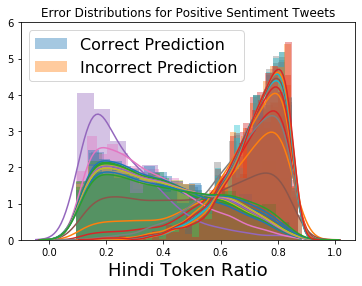

In [36]:
for i in range(0,12):
    data = load_data('check/iteration_' + str(i) + '.pkl')
    data = handle_mbert(data)
    
    positive_incorrect_codemix = []#original label is positive, but classified incorrectly
    for (tweet_id, sentence, pred_label, label, score) in data:
        if label == 'positive' and label != pred_label:
            positive_incorrect_codemix.append(codemixing[tweet_id][0]/(codemixing[tweet_id][1] + codemixing[tweet_id][0]))

    positive_correct_codemix = []#original label is positive, but classified incorrectly
    for (tweet_id, sentence, pred_label, label, score) in data:
        if label == 'positive' and label == pred_label:
            positive_correct_codemix.append(codemixing[tweet_id][0]/(codemixing[tweet_id][1] + codemixing[tweet_id][0]))

    sns.distplot(positive_correct_codemix)
    sns.distplot(positive_incorrect_codemix)
    plt.legend(['Correct Prediction', 'Incorrect Prediction'], fontsize=16)
    plt.xlabel('Hindi Token Ratio', fontsize=18)
    plt.ylim((0,6))
    plt.title('Error Distributions for Positive Sentiment Tweets')
    #plt.savefig('Plots/PerformancePositive' + str(i) + '.png')
    #plt.close()
    

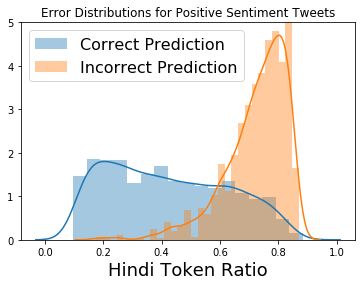

In [33]:
sns.distplot(positive_correct_codemix)
sns.distplot(positive_incorrect_codemix)
plt.legend(['Correct Prediction', 'Incorrect Prediction'], fontsize=16)
plt.xlabel('Hindi Token Ratio', fontsize=18)
plt.ylim((0,5))
plt.title('Error Distributions for Positive Sentiment Tweets')
plt.savefig('Plots/PerformanceNegative' + str(i) + '.png')

In [37]:
for i in range(0,12):
    data = load_data('check/iteration_' + str(i) + '.pkl')
    data = handle_mbert(data)
    
    negative_incorrect_codemix = []#original label is positive, but classified incorrectly
    for (tweet_id, sentence, pred_label, label, score) in data:
        if label == 'negative' and label != pred_label:
            negative_incorrect_codemix.append(codemixing[tweet_id][0]/(codemixing[tweet_id][1] + codemixing[tweet_id][0]))

    negative_correct_codemix = []#original label is positive, but classified incorrectly
    for (tweet_id, sentence, pred_label, label, score) in data:
        if label == 'negative' and label == pred_label:
            negative_correct_codemix.append(codemixing[tweet_id][0]/(codemixing[tweet_id][1] + codemixing[tweet_id][0]))
            
    sns.distplot(negative_correct_codemix)
    sns.distplot(negative_incorrect_codemix)
    plt.legend(['Correct Prediction', 'Incorrect Prediction'], fontsize=16)
    plt.xlabel('Hindi Token Ratio', fontsize=18)
    plt.ylim((0,5))
    plt.title('Error Distributions for Negative Sentiment Tweets')
    plt.savefig('Plots/PerformanceNegative' + str(i) + '.png')
    plt.close()


Counter({'1 star': 5297, '5 stars': 2519, '3 stars': 505, '2 stars': 257, '4 stars': 158})
['1 star', '2 stars', '3 stars', '4 stars', '5 stars']
Counter({'1 star': 5726, '3 stars': 3010})
['1 star', '3 stars']
Counter({'1 star': 8395, '3 stars': 341})
['1 star', '3 stars']
Counter({'1 star': 6026, '3 stars': 2710})
['1 star', '3 stars']
Counter({'1 star': 5035, '3 stars': 3701})
['1 star', '3 stars']
Counter({'1 star': 5296, '3 stars': 3440})
['1 star', '3 stars']
Counter({'1 star': 5094, '3 stars': 3642})
['1 star', '3 stars']
Counter({'1 star': 4904, '3 stars': 3832})
['1 star', '3 stars']
Counter({'1 star': 4764, '3 stars': 3972})
['1 star', '3 stars']
Counter({'1 star': 4752, '3 stars': 3984})
['1 star', '3 stars']
Counter({'1 star': 4403, '3 stars': 4333})
['1 star', '3 stars']
Counter({'3 stars': 4656, '1 star': 4080})
['1 star', '3 stars']


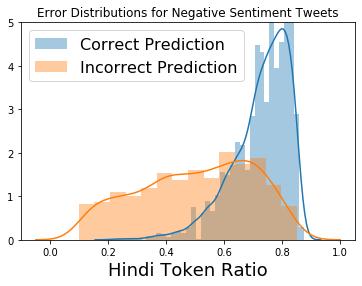

In [38]:
sns.distplot(negative_correct_codemix)
sns.distplot(negative_incorrect_codemix)
plt.legend(['Correct Prediction', 'Incorrect Prediction'], fontsize=16)
plt.xlabel('Hindi Token Ratio', fontsize=18)
plt.ylim((0,5))
plt.title('Error Distributions for Negative Sentiment Tweets')
plt.savefig('Plots/PerformanceNegative' + str(i) + '.png')

In [40]:
##Find accuracy based on Hindi Token Ratio

In [41]:
codemixing = load_data('sentimix_train_hin_eng.pkl')

In [39]:
for t in range(0,12):
    data = load_data('check/iteration_' + str(t) + '.pkl')
    data = handle_mbert(data)

    performance_by_buckets = {}
    for (tweet_id, sentence, pred_label, label, score) in data:
        ratio = codemixing[tweet_id][0]/(codemixing[tweet_id][1] + codemixing[tweet_id][0])

        if int((ratio * 100)//10) in performance_by_buckets:
            performance_by_buckets[int((ratio * 100)//10)].append(pred_label == label)
        else:
            performance_by_buckets[int((ratio * 100)//10)] = [pred_label == label]

    accuracy_by_buckets = {}
    for key in performance_by_buckets.keys():
        values = np.array(performance_by_buckets[key])
        accuracy = np.sum(values)/values.shape[0]
        accuracy_by_buckets[key] = accuracy

    accuracies = []
    x = []
    for i in range(1, 9):
        accuracies.append(accuracy_by_buckets[i])
        x.append(i)

    f, ax = plt.subplots()
    ax.bar(x, accuracies)
    ax.set_xticks(x)
    ax.set_xticklabels([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Hindi Token Ratio Buckets', fontsize=20)
    plt.ylim((0,1))
    plt.title('Performance of Model with Hindi Token Ratio', fontsize=16)
    plt.savefig('Plots/PerformancevsRatio' + str(t) + '.png')
    plt.close()

Counter({'1 star': 5297, '5 stars': 2519, '3 stars': 505, '2 stars': 257, '4 stars': 158})
['1 star', '2 stars', '3 stars', '4 stars', '5 stars']
Counter({'1 star': 5726, '3 stars': 3010})
['1 star', '3 stars']
Counter({'1 star': 8395, '3 stars': 341})
['1 star', '3 stars']
Counter({'1 star': 6026, '3 stars': 2710})
['1 star', '3 stars']
Counter({'1 star': 5035, '3 stars': 3701})
['1 star', '3 stars']
Counter({'1 star': 5296, '3 stars': 3440})
['1 star', '3 stars']
Counter({'1 star': 5094, '3 stars': 3642})
['1 star', '3 stars']
Counter({'1 star': 4904, '3 stars': 3832})
['1 star', '3 stars']
Counter({'1 star': 4764, '3 stars': 3972})
['1 star', '3 stars']
Counter({'1 star': 4752, '3 stars': 3984})
['1 star', '3 stars']
Counter({'1 star': 4403, '3 stars': 4333})
['1 star', '3 stars']
Counter({'3 stars': 4656, '1 star': 4080})
['1 star', '3 stars']
